In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data=pd.read_csv("/content/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
duplicate_rows = data.duplicated().any()
duplicate_rows

False

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

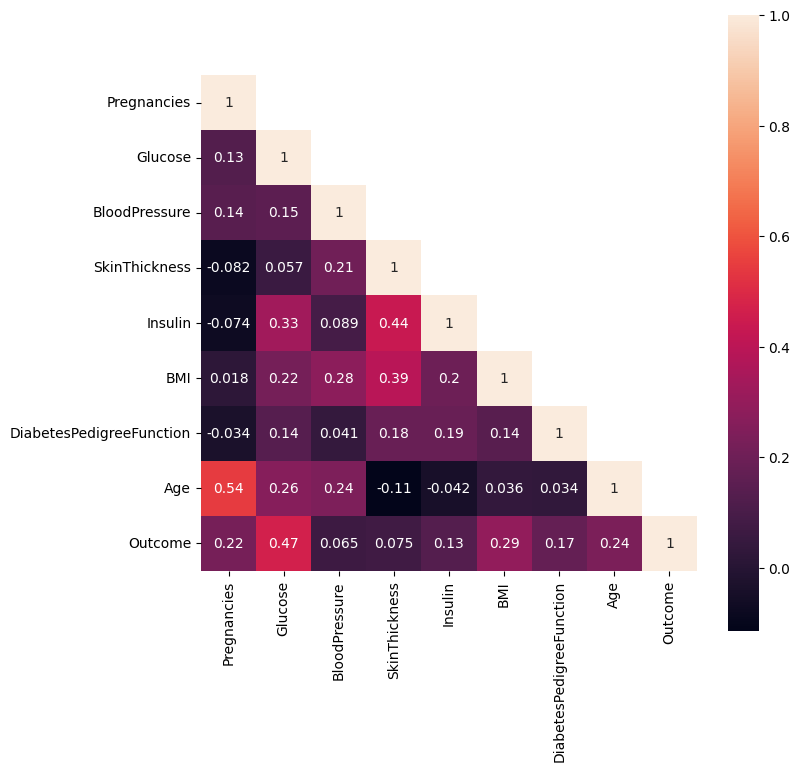

In [10]:
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [11]:
fig = px.pie(data['Outcome'].value_counts().reset_index(),
             names='index',
             values='Outcome',
             title='Outcome',
             color='index',
             color_discrete_map={'No': '#FECB52', 'Yes': 'red'},
)
fig.update_layout(
    height=400,
    width=400,
)

fig.show()

1->Diabetic Patient
0->Not a Diabetic Patient

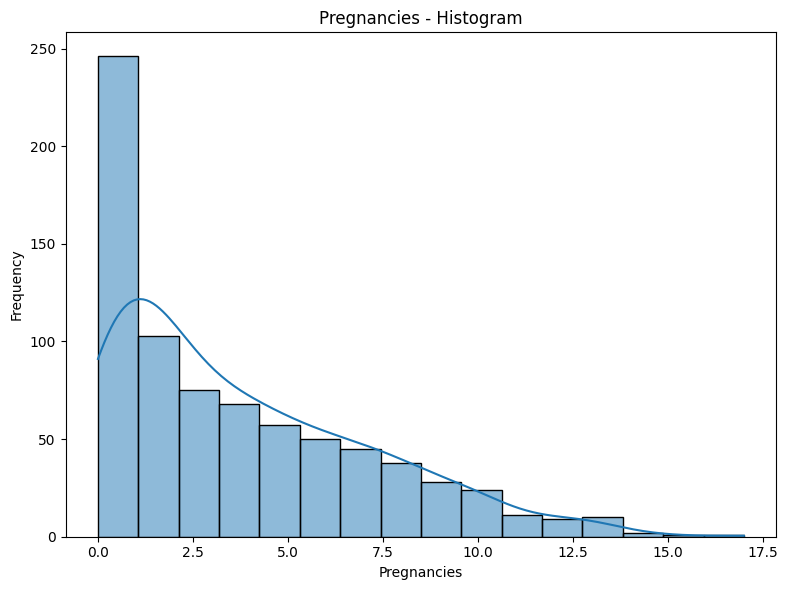

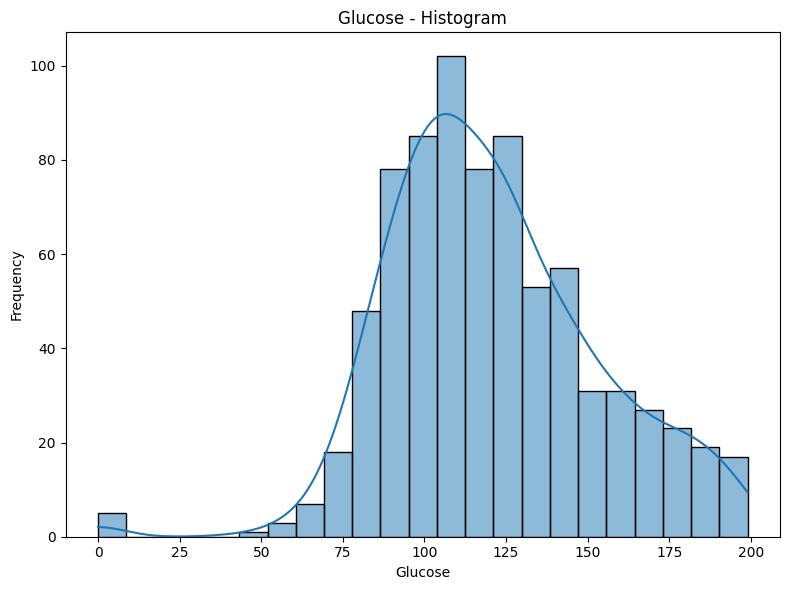

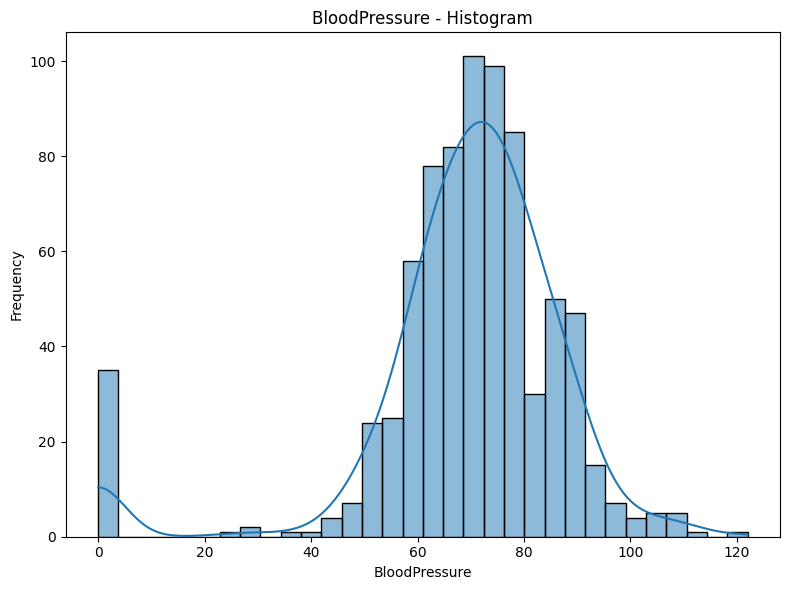

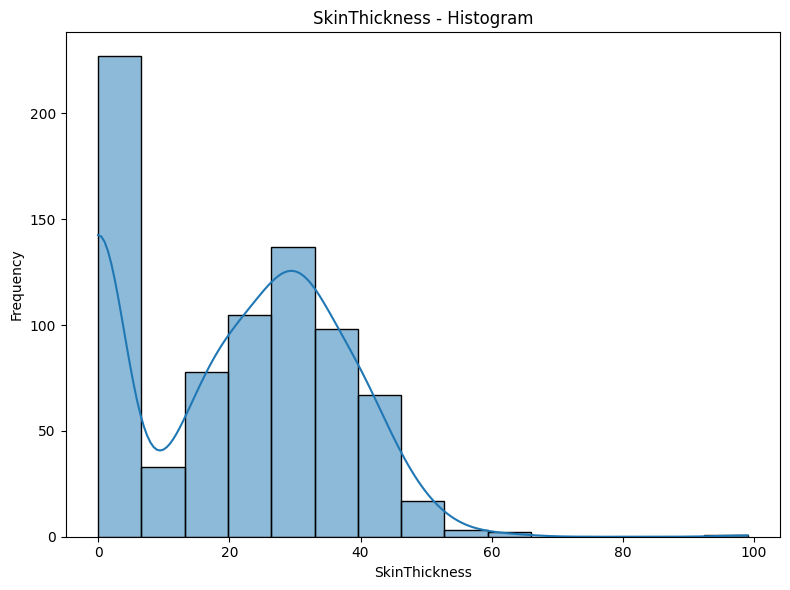

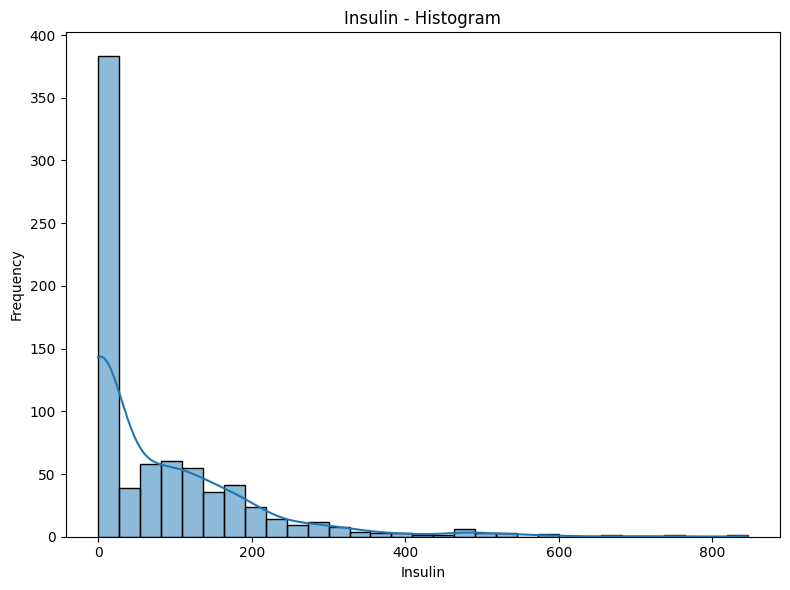

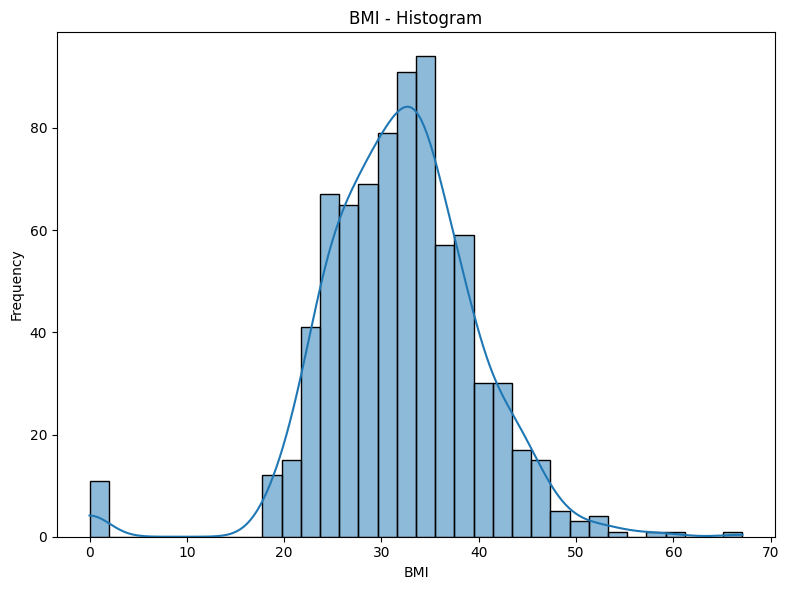

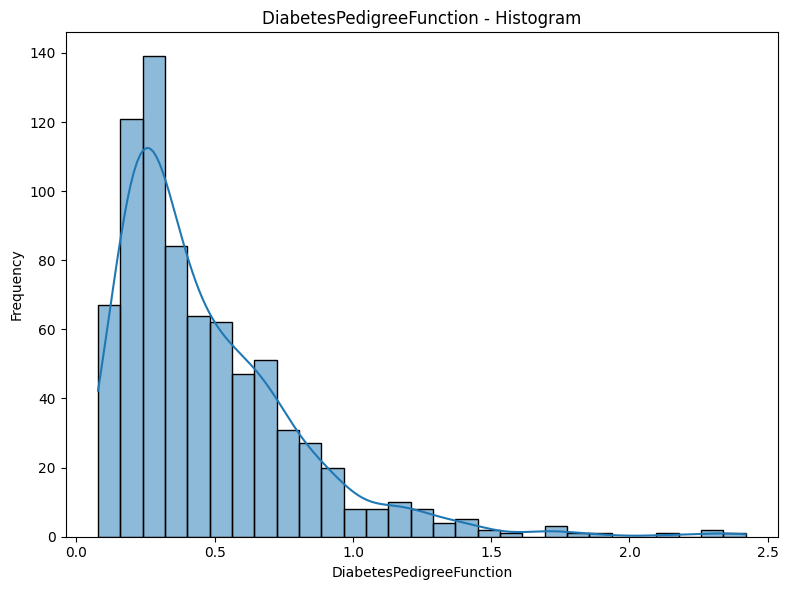

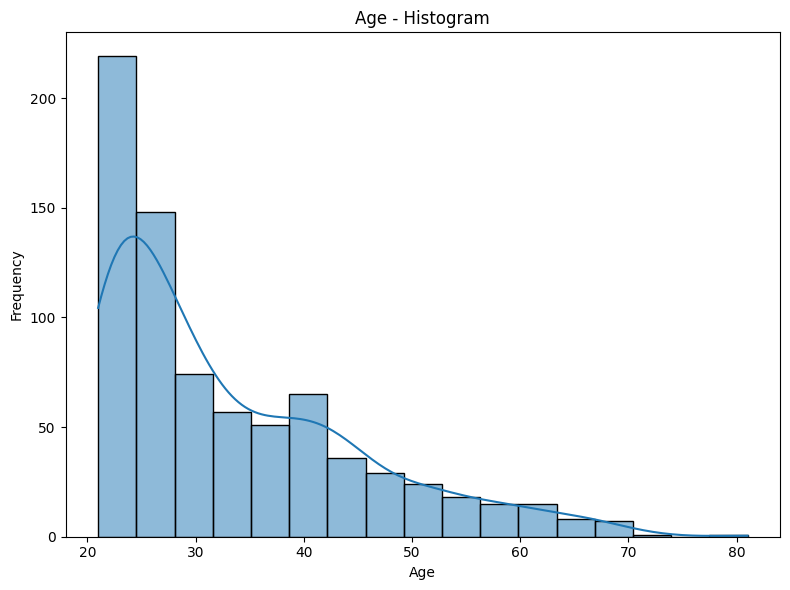

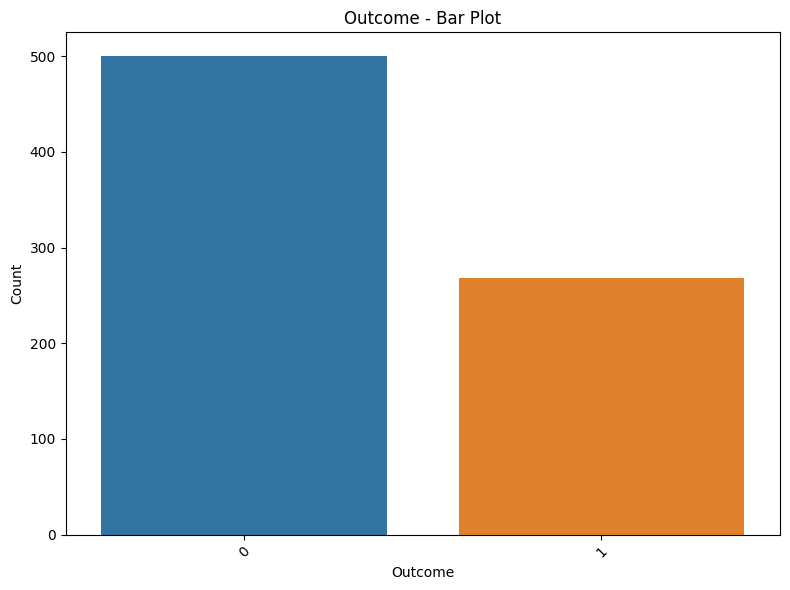

In [12]:
for column in data.columns:
    plt.figure(figsize=(8, 6))

    if data[column].dtype == 'object' or data[column].nunique() < 10:
        # Categorical or discrete data: Bar plot
        sns.countplot(x=column, data=data)
        plt.title(f'{column} - Bar Plot')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    else:
        # Numerical data: Histogram
        sns.histplot(data[column], kde=True)
        plt.title(f'{column} - Histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Machine Learning

In [13]:
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [14]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
x,y=SMOTE().fit_resample(x,y)

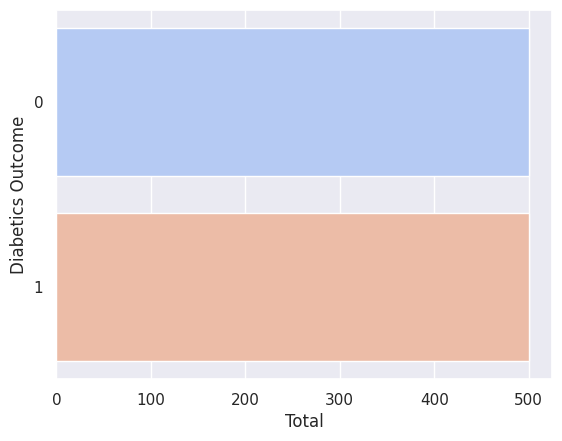

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Diabetics Outcome')
plt.xlabel('Total')
plt.show()

In [17]:
x = MinMaxScaler().fit_transform(x)

Logistic Regression

In [18]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [19]:
y_pred=model.predict(x)

In [20]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
conf_matrix = confusion_matrix(y, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.752
Precision: 0.752327015812493
Recall: 0.752
F1 Score: 0.7519196219575142
Confusion Matrix:
[[385 115]
 [133 367]]


KNN Model

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x, y)

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(x)

In [23]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
conf_matrix = confusion_matrix(y, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.857
Precision: 0.8617006618007627
Recall: 0.857
F1 Score: 0.8565338785714787
Confusion Matrix:
[[400 100]
 [ 43 457]]


In [24]:
def predict(input_data):
    ans = knn_model.predict([input_data])[0]
    return ans

def get_user_input():
    a1 = float(input("Enter Pregnancies: "))
    a2 = float(input("Enter Glucose: "))
    a3 = float(input("Enter BloodPressure: "))
    a4 = float(input("Enter SkinThickness: "))
    a5 = float(input("Enter Insulin: "))
    a6 = float(input("Enter BMI: "))
    a7 = float(input("Enter DiabetesPedigreeFunction: "))
    a8 = float(input("Enter Age: "))

    return [a1, a2, a3, a4, a5, a6, a7, a8]

user_input = get_user_input()
prediction = predict(user_input)

if prediction == 1:
    print("Diabetic Patient")
else:
    print("Not a Diabetic Patient")

Enter Pregnancies: 4
Enter Glucose: 123
Enter BloodPressure: 145
Enter SkinThickness: 46
Enter Insulin: 56
Enter BMI: 23
Enter DiabetesPedigreeFunction: 0.453
Enter Age: 56
Diabetic Patient
